In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


<AxesSubplot:xlabel='gender', ylabel='count'>

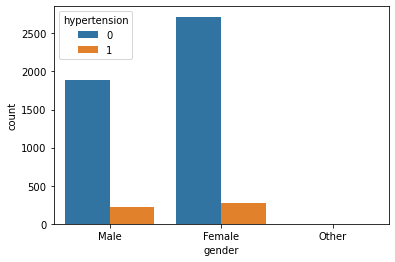

In [7]:
sns.countplot(x='gender', hue='hypertension', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

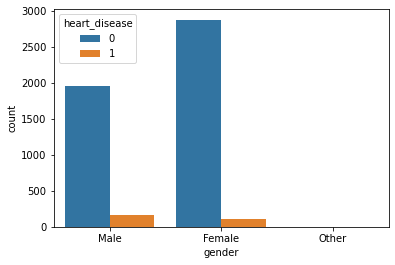

In [8]:
sns.countplot(x='gender', hue='heart_disease', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

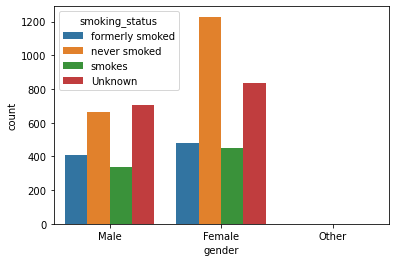

In [9]:
sns.countplot(x='gender', hue='smoking_status', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

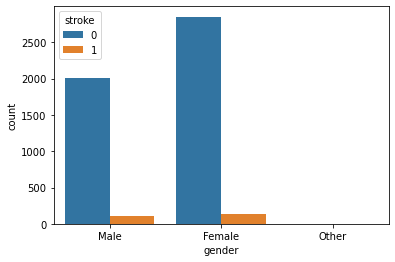

In [10]:
sns.countplot(x='gender', hue='stroke', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

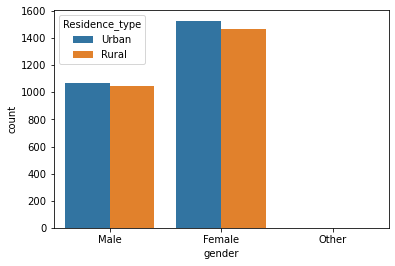

In [11]:
sns.countplot(x='gender', hue='Residence_type', data=df)

<AxesSubplot:xlabel='work_type', ylabel='count'>

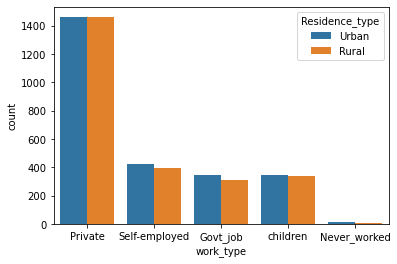

In [12]:
sns.countplot(x='work_type', hue='Residence_type', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

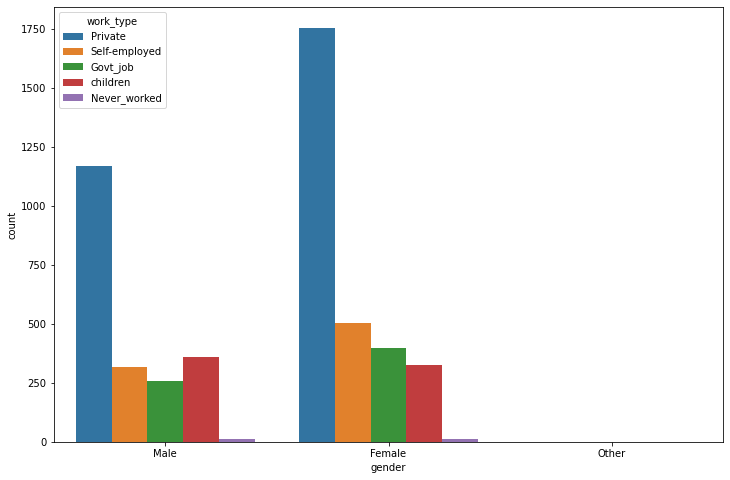

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='gender', hue='work_type', data=df)


In [14]:
df['bmi'].loc[df['bmi']>50].count()

79

In [15]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df['bmi']=np.where(df['bmi'].isnull(),df['bmi'].median(),df['bmi'])

<AxesSubplot:xlabel='bmi'>

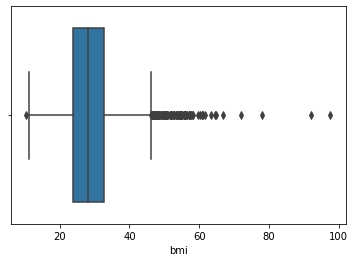

In [17]:
sns.boxplot(x='bmi', data=df)

<AxesSubplot:xlabel='avg_glucose_level'>

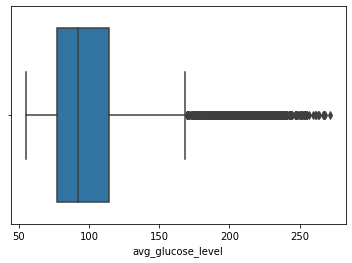

In [18]:
sns.boxplot(x='avg_glucose_level', data=df)

In [19]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
def remove_outliers(data):
    arr = []
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    minm = q1 - (1.5*iqr)
    maxm = q3 + (1.5*iqr)
    
    for i in list(data):
        if i < minm:
            i = minm
            arr.append(i)
        elif i > maxm:
            i = maxm
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
    return arr

In [21]:
df['bmi']=remove_outliers(df['bmi'])
df['avg_glucose_level']=remove_outliers(df['avg_glucose_level'])

<AxesSubplot:xlabel='bmi'>

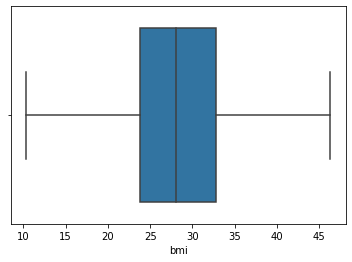

In [22]:
sns.boxplot(x='bmi', data=df)

<AxesSubplot:xlabel='avg_glucose_level'>

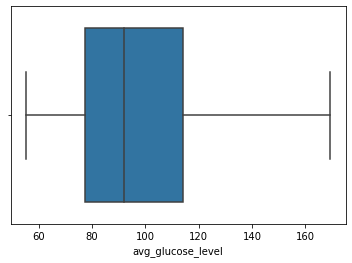

In [23]:
sns.boxplot(x='avg_glucose_level', data=df)

<AxesSubplot:>

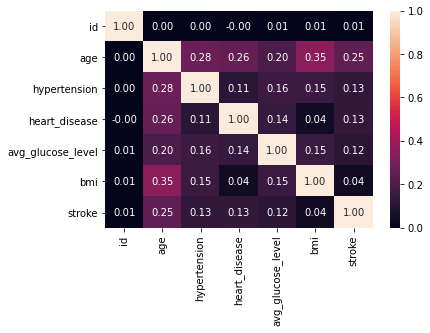

In [24]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [25]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


In [26]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['gender'] = enc.fit_transform(df['gender'])
df['ever_married'] = enc.fit_transform(df['ever_married'])
df['work_type'] = enc.fit_transform(df['work_type'])
df['Residence_type'] = enc.fit_transform(df['Residence_type'])
df['smoking_status'] = enc.fit_transform(df['smoking_status'])

In [28]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,169.3575,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,169.3575,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.9200,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,169.3575,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,169.3575,24.0,2,1


In [29]:
df['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [30]:
df = df.drop('id', axis=1)

In [31]:
print(df['gender'].value_counts())
print('_'*50)
print(df['work_type'].value_counts())
print('_'*50)
df['smoking_status'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64
__________________________________________________
2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64
__________________________________________________


2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [32]:
print(df.shape)

(5110, 11)


In [33]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [34]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_os,y_os=oversample.fit_resample(x, y)

In [35]:
print(x_os.shape)
print(y_os.shape)

(9722, 10)
(9722,)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_os,y_os, test_size=0.3, random_state=10)

In [38]:
path = RandomForestClassifier.get_params

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
X = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [40]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X,y_train)
rf_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
accuracy_rf

0.9883441892355159

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X,y_train)
xgb_pred = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgb_pred)
accuracy_xgb

[21:43:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9674322934521769

In [42]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X,y_train)
svm_pred = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_pred)
accuracy_svm

0.8183064792595132

In [43]:
lr = LogisticRegression(max_iter=800)
lr.fit(X,y_train)
lr_pred = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_pred)
accuracy_lr

0.774082961947206

<AxesSubplot:>

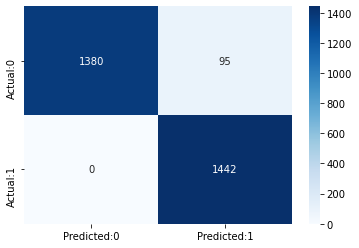

In [44]:
xgb_cm = pd.DataFrame(data=confusion_matrix(y_test,xgb_pred),columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(xgb_cm, annot=True,fmt='d',cmap="Blues")

In [45]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1475
           1       0.94      1.00      0.97      1442

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



<AxesSubplot:>

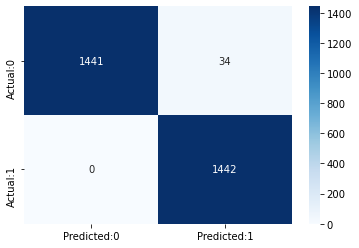

In [46]:
rf_cm = pd.DataFrame(data=confusion_matrix(y_test,rf_pred),columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(rf_cm, annot=True,fmt='d',cmap="Blues")

In [47]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1475
           1       0.98      1.00      0.99      1442

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1475
           1       0.75      0.82      0.78      1442

    accuracy                           0.77      2917
   macro avg       0.78      0.77      0.77      2917
weighted avg       0.78      0.77      0.77      2917



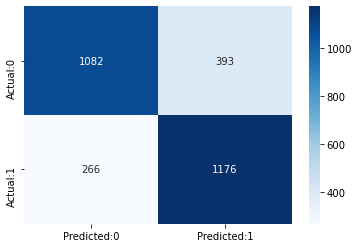

In [48]:
lr_cm = pd.DataFrame(data=confusion_matrix(y_test,lr_pred),columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(lr_cm, annot=True,fmt='d',cmap="Blues")
print(classification_report(y_test,lr_pred))

In [49]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, x_test, y_test, cv=6))

[0.78028747 0.75308642 0.76954733 0.78600823 0.75720165 0.78806584]


In [50]:
print(cross_val_score(lr, x_train, y_train, cv=6))

[0.77797357 0.76719577 0.77336861 0.77777778 0.76455026 0.76631393]


In [51]:
print(cross_val_score(lr, x, y, cv=6))

[0.95070423 0.95070423 0.95070423 0.95070423 0.95299647 0.95182139]


In [52]:
print(cross_val_score(xgb, x, y, cv=6))

[21:43:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [53]:
pickle.dump(xgb, open('model.pkl','wb'))

In [54]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict(np.array([[1,27,0,0,0,2,1,150,25,2]])))

[0]
